In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('aahaber.csv',engine='python',sep = ';')

sentences_training = data.iloc[:,2]
data_label = data.iloc[:,1]

Using TensorFlow backend.
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(data_label)
y = to_categorical(y)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)  

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(8,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.
Train on 15999 samples, validate on 4000 samples
Epoch 1/25
15999/15999 [==============================] - 409s 26ms/step - loss: 0.3502 - accuracy: 0.8750 - val_loss: 0.3346 - val_accuracy: 0.8750
Epoch 2/25
15999/15999 [==============================] - 250s 16ms/step - loss: 0.3153 - accuracy: 0.8754 - val_loss: 0.3084 - val_accuracy: 0.8762
Epoch 3/25
15999/15999 [==============================] - 267s 17ms/step - loss: 0.3043 - accuracy: 0.8779 - val_loss: 0.3020 - val_accuracy: 0.8793
Epoch 4/25
15999/15999 [==============================] - 470s 29ms/step - loss: 0.2989 - accuracy: 0.8801 - val_loss: 0.2962 - val_accuracy: 0.8795
Epoch 5/25
15999/15999 [==============================] - 461s 29ms/step - loss: 0.2952 - accuracy: 0.8808 - val_loss: 0.2963 - val_accuracy: 0.8804
Epoch 6/25
15999/15999 [==============================] - 391s 24ms/step - loss: 0.2937 - accuracy: 0.8815 - val_loss: 0.2949 - val_accuracy: 0.8790
Epoch 7/2

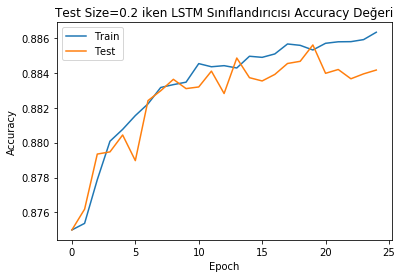

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

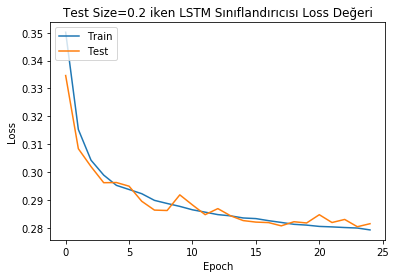

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.50)  

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(8,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 9999 samples, validate on 10000 samples
Epoch 1/25
9999/9999 [==============================] - 167s 17ms/step - loss: 0.3630 - accuracy: 0.8750 - val_loss: 0.3374 - val_accuracy: 0.8750
Epoch 2/25
9999/9999 [==============================] - 163s 16ms/step - loss: 0.3259 - accuracy: 0.8752 - val_loss: 0.3135 - val_accuracy: 0.8759
Epoch 3/25
9999/9999 [==============================] - 162s 16ms/step - loss: 0.3099 - accuracy: 0.8777 - val_loss: 0.3113 - val_accuracy: 0.8778
Epoch 4/25
9999/9999 [==============================] - 161s 16ms/step - loss: 0.3039 - accuracy: 0.8796 - val_loss: 0.3016 - val_accuracy: 0.8792
Epoch 5/25
9999/9999 [==============================] - 162s 16ms/step - loss: 0.2998 - accuracy: 0.8796 - val_loss: 0.2989 - val_accuracy: 0.8789
Epoch 6/25
9999/9999 [==============================] - 162s 16ms/step - loss: 0.2973 - accuracy

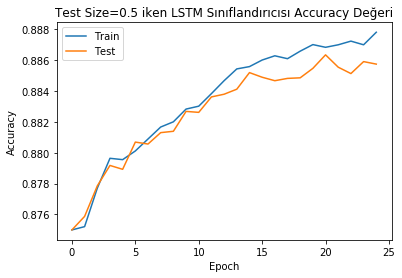

In [5]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

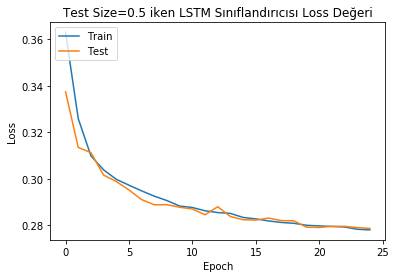

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.70)  

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=x.shape[1]))
model.add (LSTM(8, return_sequences=True))
model.add (LSTM(4,return_sequences=False))
model.add(Dense(8,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1, validation_data=(x_test, y_test))
predictions=model.predict(x_test)
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 5999 samples, validate on 14000 samples
Epoch 1/25
5999/5999 [==============================] - 140s 23ms/step - loss: 0.3724 - accuracy: 0.8750 - val_loss: 0.3625 - val_accuracy: 0.8750
Epoch 2/25
5999/5999 [==============================] - 138s 23ms/step - loss: 0.3535 - accuracy: 0.8750 - val_loss: 0.3472 - val_accuracy: 0.8750
Epoch 3/25
5999/5999 [==============================] - 137s 23ms/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.3308 - val_accuracy: 0.8750
Epoch 4/25
5999/5999 [==============================] - 138s 23ms/step - loss: 0.3261 - accuracy: 0.8750 - val_loss: 0.3190 - val_accuracy: 0.8750
Epoch 5/25
5999/5999 [==============================] - 136s 23ms/step - loss: 0.3166 - accuracy: 0.8750 - val_loss: 0.3123 - val_accuracy: 0.8750
Epoch 6/25
5999/5999 [==============================] - 137s 23ms/step - loss: 0.3108 - accuracy: 0.8750 - val_loss: 0.3065 - val_accuracy: 0.8750
Epoch 7/25
5999/5999 [==============================] - 139s 23ms/ste

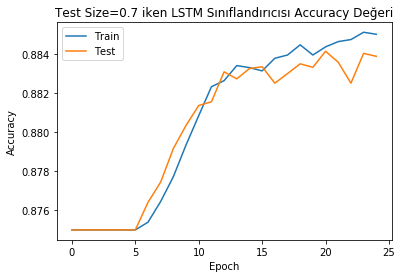

In [9]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken LSTM Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

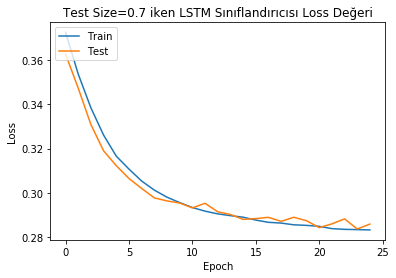

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken LSTM Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()